# Impor Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix as scatter

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [2]:
df = pd.read_csv(r"C:\Users\Andre Pras\archive\CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File berada pada level pelanggan dengan 18 variabel perilaku.

Berikut penjelasan Data Dataset Kartu Kredit :-

CUSTID : Identifikasi Pemegang Kartu Kredit (Kategori)<br><br>
BALANCE : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian<br><br>
BALANCEFREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)<br><br>
PURCHASES : Jumlah pembelian yang dilakukan dari akun<br><br>
ONEOFFPURCHASES : Jumlah pembelian maksimum dilakukan dalam sekali jalan<br><br>
INSTALLMENTS PURCHASES  : Jumlah pembelian dilakukan secara angsuran<br><br>
CASHADVANCE : Uang muka yang diberikan oleh pengguna<br><br>
PURCHASES FREQUENCY  : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)<br><br>
ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)<br><br>
PURCHASES INSTALLMENTS FREQUENCY  : Seberapa sering dilakukan pembelian secara mencicil (1 = sering dilakukan, 0 = tidak sering dilakukan)<br><br>
CASHADVANCEFREQUENCY : Seberapa sering uang muka dibayarkan<br><br>
CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"<br><br>
PURCHASESTRX : Jumlah transaksi pembelian yang dilakukan<br><br>
CREDITLIMIT : Batas Kartu Kredit untuk pengguna<br><br>
PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna<br><br>
MINIMUM_PAYMENTS : Jumlah pembayaran minimum yang dilakukan oleh pengguna<br><br>
PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna<br><br>
TENURE : Jangka waktu layanan kartu kredit untuk pengguna<br><br>

In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [7]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
df.shape

(8950, 18)

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


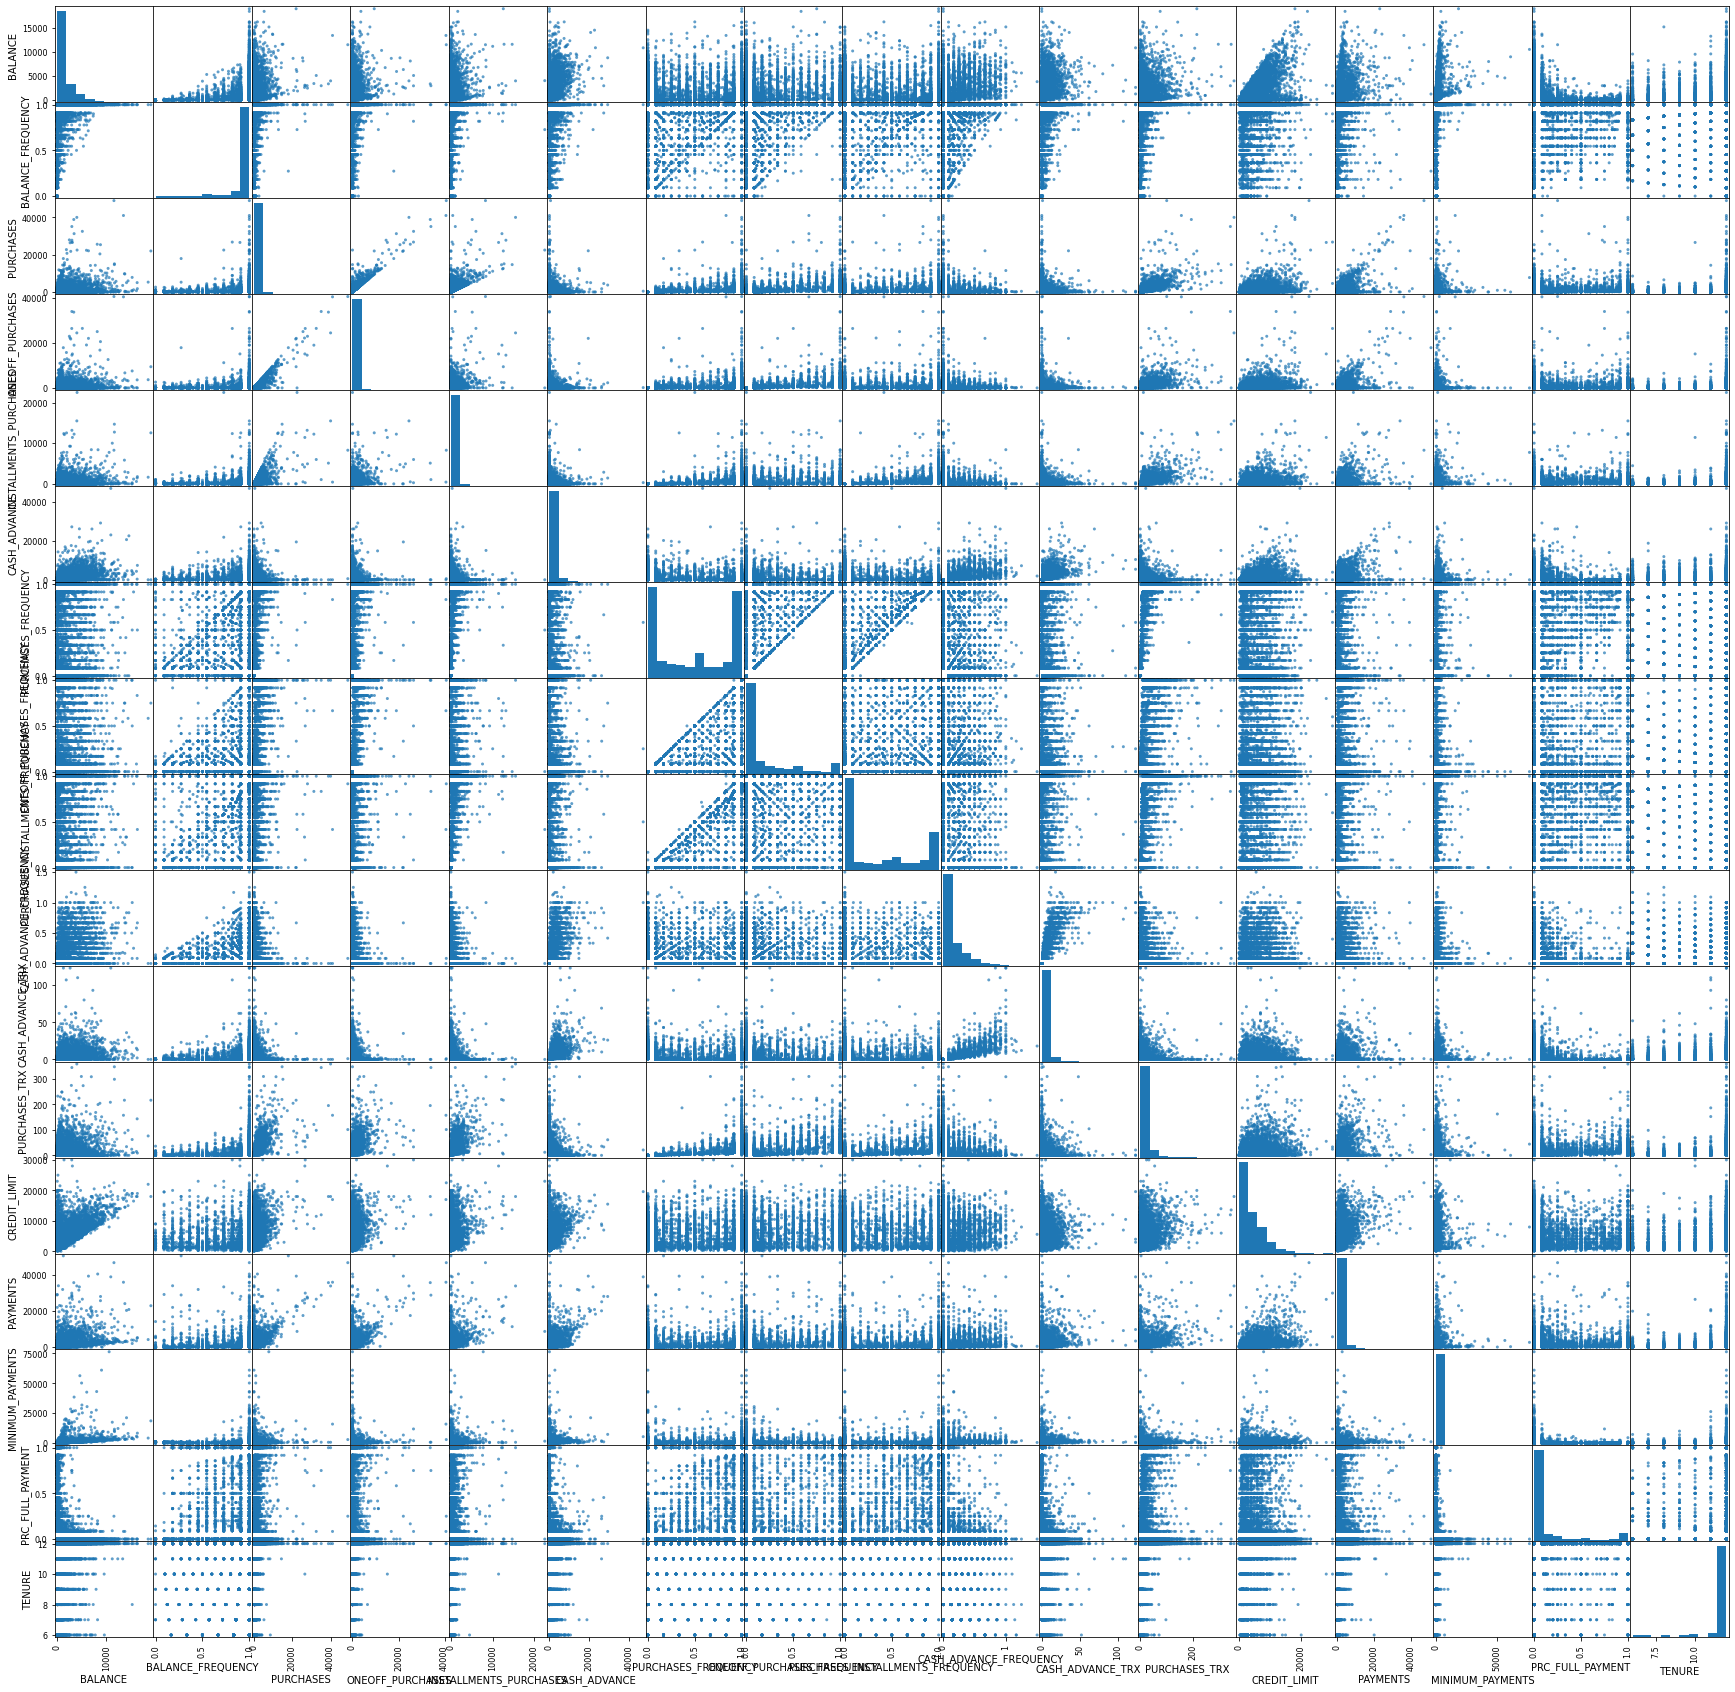

In [10]:
scatter(df, alpha = 0.7, figsize = (30,30))
plt.show()

In [11]:
data = df.corr(method='pearson')

<AxesSubplot:>

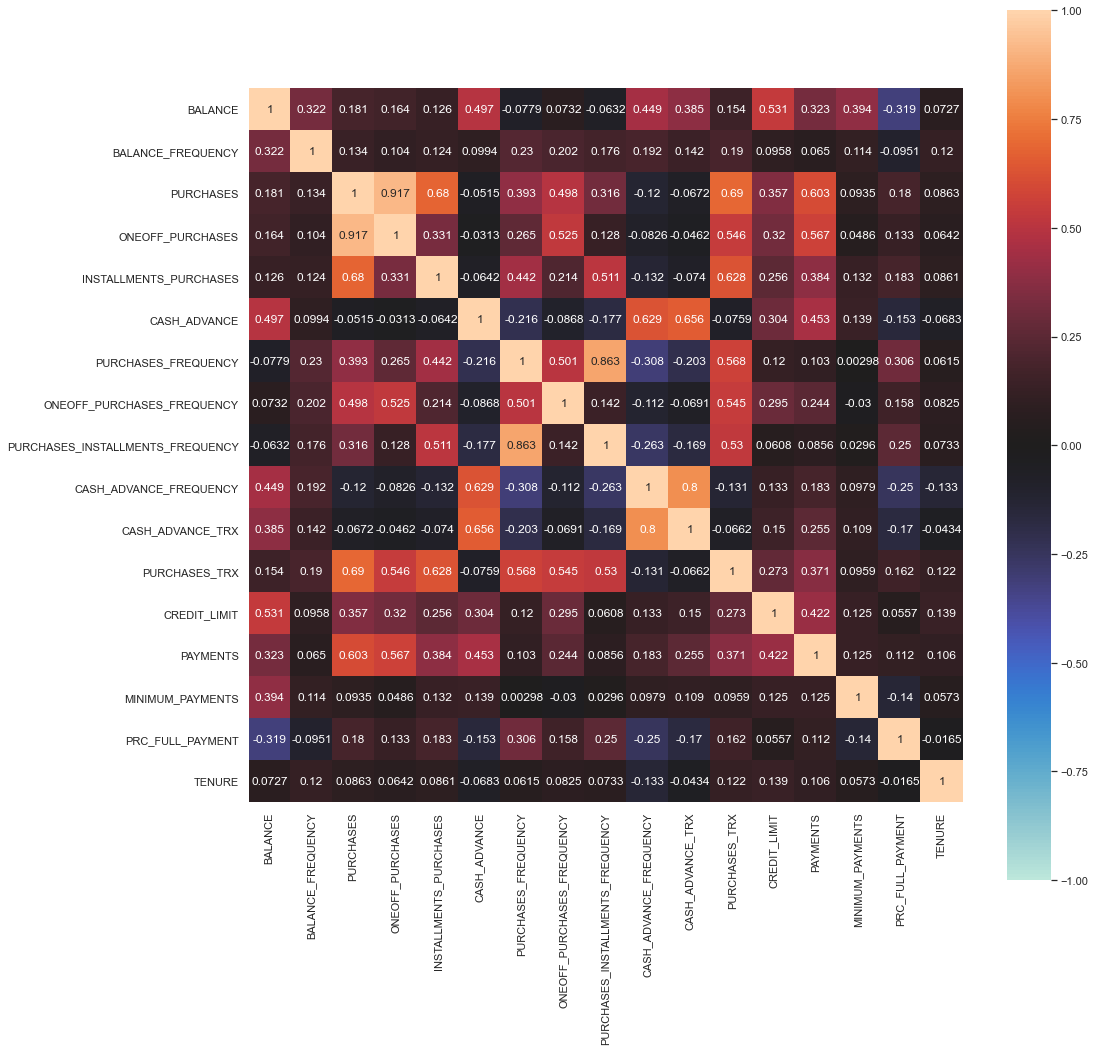

In [12]:
sns.set(rc = {'figure.figsize':(16,16)})
sns.heatmap(data, annot=True, fmt='.3g', vmax=1, vmin=-1, center=0, square=True)

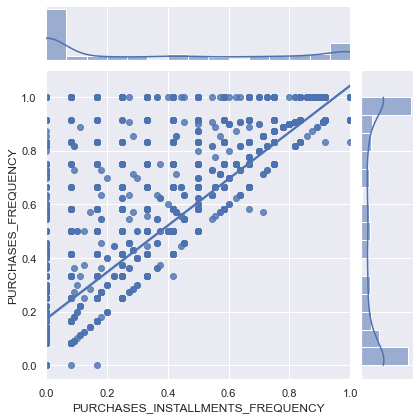

In [13]:
sns.jointplot(x=df['PURCHASES_INSTALLMENTS_FREQUENCY'], 
              y=df['PURCHASES_FREQUENCY'], 
              data=data, 
              kind="reg");
plt.show()

In [14]:
credit = df.drop(['CUST_ID'], axis = 1)

In [15]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = MinMaxScaler()
# scaler = StandardScaler()

scaled = scaler.fit_transform(credit)
scaled = pd.DataFrame(scaled, columns = credit.columns)
scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


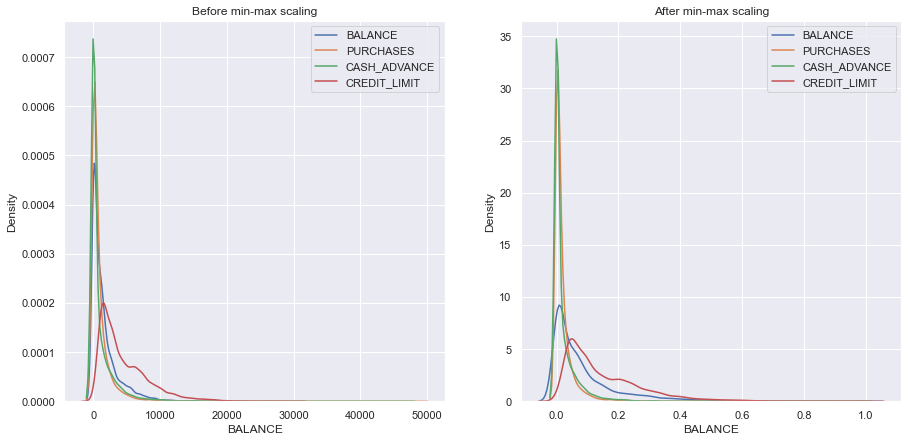

In [18]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (15,7))

ax1.set_title('Before min-max scaling')
sns.kdeplot(credit['BALANCE'], ax=ax1)
sns.kdeplot(credit['PURCHASES'], ax=ax1)
sns.kdeplot(credit['CASH_ADVANCE'], ax=ax1)
sns.kdeplot(credit['CREDIT_LIMIT'], ax=ax1)
ax1.legend(['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT'])

ax2.set_title('After min-max scaling')
sns.kdeplot(scaled['BALANCE'], ax=ax2)
sns.kdeplot(scaled['PURCHASES'], ax=ax2)
sns.kdeplot(scaled['CASH_ADVANCE'], ax=ax2)
sns.kdeplot(scaled['CREDIT_LIMIT'], ax=ax2)
ax2.legend(['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT'])
plt.show()

In [19]:
from sklearn.cluster import KMeans

In [20]:
dist = []
rand_state = 2021
jml_cluster = range(1,10)
for clr in jml_cluster:
    kmeanModel = KMeans(n_clusters=clr, random_state = rand_state)
    mod = kmeanModel.fit(scaled)
    elbow = dist.append(kmeanModel.inertia_)

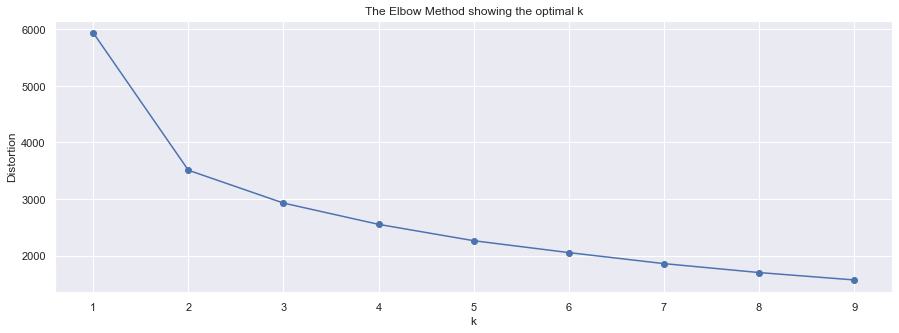

In [21]:
plt.figure(figsize=(15,5))
plt.plot(jml_cluster, dist, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
clustering = KMeans(n_clusters = 2, random_state = rand_state)
model = clustering.fit_predict(scaled)

In [23]:
scaled['cluster'] = clustering.labels_
centroids = clustering.cluster_centers_
inertia = clustering.inertia_

In [24]:
cluster = pd.DataFrame(scaled['cluster']).astype(str)

In [25]:
hasil = pd.concat([df,cluster],1)
hasil.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


# Analisi Hasil

In [26]:
centroid = pd.DataFrame(centroids, columns = credit.columns)
centroid = centroid.transpose()
centroid

,0,1
BALANCE,0.088991,0.073827
BALANCE_FREQUENCY,0.828487,0.936694
PURCHASES,0.006589,0.037349
ONEOFF_PURCHASES,0.006313,0.024548
INSTALLMENTS_PURCHASES,0.002934,0.036949
CASH_ADVANCE,0.027938,0.012031
PURCHASES_FREQUENCY,0.159859,0.892919
ONEOFF_PURCHASES_FREQUENCY,0.092650,0.336214
PURCHASES_INSTALLMENTS_FREQUENCY,0.065874,0.728114
CASH_ADVANCE_FREQUENCY,0.121525,0.051813


In [27]:
ukur  = scaled.drop('cluster',1).mean()
rata2 = pd.DataFrame(ukur, columns = ['mean'])

In [28]:
eval_ = centroid.join(rata2)

In [29]:
eval_

,0,1,mean
BALANCE,0.088991,0.073827,0.082154
BALANCE_FREQUENCY,0.828487,0.936694,0.877271
PURCHASES,0.006589,0.037349,0.020457
ONEOFF_PURCHASES,0.006313,0.024548,0.014534
INSTALLMENTS_PURCHASES,0.002934,0.036949,0.018270
CASH_ADVANCE,0.027938,0.012031,0.020766
PURCHASES_FREQUENCY,0.159859,0.892919,0.490351
ONEOFF_PURCHASES_FREQUENCY,0.092650,0.336214,0.202458
PURCHASES_INSTALLMENTS_FREQUENCY,0.065874,0.728114,0.364437
CASH_ADVANCE_FREQUENCY,0.121525,0.051813,0.090096


In [30]:
conditions = [
    (eval_['mean'] < eval_[0]),
    (eval_['mean'] > eval_[0]),
    ]

values = ['upper', 'lower']
eval_['eval_0'] = np.select(conditions, values)

In [31]:
conditions = [
    (eval_['mean'] < eval_[1]),
    (eval_['mean'] > eval_[1]),
    ]

values = ['upper', 'lower']
eval_['eval_1'] = np.select(conditions, values)

In [32]:
eval_

,0,1,mean,eval_0,eval_1
BALANCE,0.088991,0.073827,0.082154,upper,lower
BALANCE_FREQUENCY,0.828487,0.936694,0.877271,lower,upper
PURCHASES,0.006589,0.037349,0.020457,lower,upper
ONEOFF_PURCHASES,0.006313,0.024548,0.014534,lower,upper
INSTALLMENTS_PURCHASES,0.002934,0.036949,0.018270,lower,upper
CASH_ADVANCE,0.027938,0.012031,0.020766,upper,lower
PURCHASES_FREQUENCY,0.159859,0.892919,0.490351,lower,upper
ONEOFF_PURCHASES_FREQUENCY,0.092650,0.336214,0.202458,lower,upper
PURCHASES_INSTALLMENTS_FREQUENCY,0.065874,0.728114,0.364437,lower,upper
CASH_ADVANCE_FREQUENCY,0.121525,0.051813,0.090096,upper,lower


<AxesSubplot:>

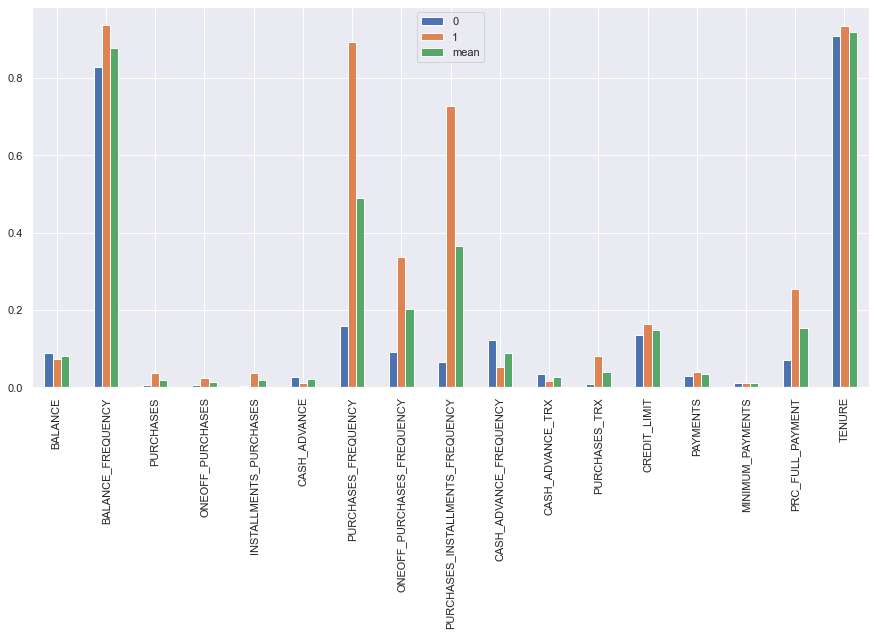

In [33]:
eval_.plot(kind = 'bar', figsize=(15,7))

Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File berada pada level pelanggan dengan 18 variabel perilaku.

Berikut penjelasan Data Dataset Kartu Kredit :-

CUSTID : Identifikasi Pemegang Kartu Kredit (Kategori)<br><br>
BALANCE : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian<br><br>
BALANCEFREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)<br><br>
PURCHASES : Jumlah pembelian yang dilakukan dari akun<br><br>
ONEOFFPURCHASES : Jumlah pembelian maksimum dilakukan dalam sekali jalan<br><br>
INSTALLMENTS PURCHASES  : Jumlah pembelian dilakukan secara angsuran<br><br>
CASHADVANCE : Uang muka yang diberikan oleh pengguna<br><br>
PURCHASES FREQUENCY  : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)<br><br>
ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)<br><br>
PURCHASES INSTALLMENTS FREQUENCY  : Seberapa sering dilakukan pembelian secara mencicil (1 = sering dilakukan, 0 = tidak sering dilakukan)<br><br>
CASHADVANCEFREQUENCY : Seberapa sering uang muka dibayarkan<br><br>
CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"<br><br>
PURCHASESTRX : Jumlah transaksi pembelian yang dilakukan<br><br>
CREDITLIMIT : Batas Kartu Kredit untuk pengguna<br><br>
PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna<br><br>
MINIMUM_PAYMENTS : Jumlah pembayaran minimum yang dilakukan oleh pengguna<br><br>
PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna<br><br>
TENURE : Jangka waktu layanan kartu kredit untuk pengguna<br><br>